

# Project: Investigating Medical Appointment No Show Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Medical Appointment dataset contains information on if a patient shows up for their appointments or not. The goal of this project is to analyze and draw insights from the data and  answer questions like:
1. What Day of The Week Has More Patients Showing Up For Their Appointments?
2. What Age Category has the most appointments and what category shows up more often ?
3. What is the average waiting time ?
4. Who has the longest waiting time (Age Category) ?
5. What is the ratio of missed appointments male to female ?
6. What location has the highest number of show up ?

Please note that "No" means Patients showed up for their appointment. "Yes" means patients did not show up.

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [125]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')
%matplotlib inline

In [126]:
#load dataset

df = pd.read_csv("KaggleV2-May-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [127]:
#check data dimensionality
df.shape

(110527, 14)

> The dataset has 110527 rows and 14 columns

In [128]:
#check data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

> Some columns have mismatched data types. `PatientId` should be of an `int` datatype. While `ScheduleDay` and `AppointmentDay` should be `datetimes`.

In [129]:
#check for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [130]:
#Check data description

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [131]:
#Check for duplicates
sum(df.duplicated())

0

> There are no duplicated rows or missing values

In [132]:
#check unique values for all columns

#get a list of all columns
col = []

for i in df.columns:
    col.append(i)
    
#Exclude PatientId,AppointmentID,AppointmentDay, ScheduledDay
col.remove("PatientId")
col.remove("AppointmentID")
col.remove("AppointmentDay")
col.remove("ScheduledDay")



#Get number of unique values and the unique values
for c in col:
    print("{} has {} unique values:\n {}".format(c, df[c].nunique(), df[c].unique()))

Gender has 2 unique values:
 ['F' 'M']
Age has 104 unique values:
 [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]
Neighbourhood has 81 unique values:
 ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA V

> Observing the unique values of each column, there are a few outliers in some columns:
>1. `Age`: Age can not be negative or less than 0
>2. `Handcap`: Compared to other categorical columns there appears to be 4 values. On further research it appears that `Handcap` is the number of disabilities an individual has.

In [133]:
#Value counts of columns
for c in col:
    print("{}:\n {}\n".format(c, df[c].value_counts()))

Gender:
 F    71840
M    38687
Name: Gender, dtype: int64

Age:
  0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

Neighbourhood:
 JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

Scholarship:
 0    99666
1    10861
Name: Scholarship, dtype: int64

Hipertension:
 0    88726
1    21801
Name: Hipertension, dtype: int64

Diabetes:
 0    102584
1      7943
Name: Diabetes, dtype: int64

Alcoholism:
 0    107167
1      3360
Name: Alcoholism, dtype: int64

Handcap:
 0    108286



### Data Cleaning 
The data cleaning process involves:
1. Renaming columns with appropriate names
2. Converting mismatched columns with the right data types
3. Droping rows with Age less than 0

In [134]:
#Rename column
col = {'Hipertension':'Hypertension','Handcap':'Handicap', 'No-show':'No_show'}
df.rename(columns=col, inplace=True)

In [135]:
#changing data types of ScheduledDay, AppointmentDay

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'],format="%Y-%m-%dT%H:%M:%SZ")
df['ScheduledDay'] = pd.to_datetime(df["ScheduledDay"].dt.strftime('%Y-%m-%d'))#change format to drop timestamp

df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'],format="%Y-%m-%dT%H:%M:%SZ")


In [136]:
#change patientId dtype to str

df["PatientId"]=df["PatientId"].astype("str")

In [137]:
#check to ensure change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  object        
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hypertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handicap        110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No_show         110527 non-null  object        
dtypes: datetime64[ns](2), int64(8), obje

In [138]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [139]:
#drop column where age = -1

df.drop(df[df['Age'] == -1].index, inplace = True)

In [140]:
#check if min age != -1

min(df.Age)

0

### Feature Engineering
This step involves creating new columns and features based on the dataset that would aid further analysis

In [141]:
#create "WaitDays" column that tells how long the patient waited between schedule date and appointment date

df['WaitDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [142]:
#create 'Appointment_dow' that tells what day of the week the appointment was
df['Appointment_dow'] =  df['AppointmentDay'].dt.day_name()

In [143]:
#create 'Appoinntment_mo' that explains what month the appointment was made

df['Appointment_mo'] = df['AppointmentDay'].dt.month_name()

In [144]:
#Classify age groups 
df['Age_cat'] = pd.cut(
                        x=df['Age'],
                        bins=[0, 12, 19, 59, 115],
                        labels= ["Child", "Teen","Adult", "Senior"],
                        include_lowest=True)

In [145]:

#verify changes/new columns

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitDays,Appointment_dow,Appointment_mo,Age_cat
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Friday,April,Senior
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Friday,April,Adult
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Friday,April,Senior
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Friday,April,Child
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Friday,April,Adult


In [292]:
#new data dimensionality
df.shape

(110526, 18)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   PatientId        110526 non-null  object        
 1   AppointmentID    110526 non-null  int64         
 2   Gender           110526 non-null  object        
 3   ScheduledDay     110526 non-null  datetime64[ns]
 4   AppointmentDay   110526 non-null  datetime64[ns]
 5   Age              110526 non-null  int64         
 6   Neighbourhood    110526 non-null  object        
 7   Scholarship      110526 non-null  int64         
 8   Hypertension     110526 non-null  int64         
 9   Diabetes         110526 non-null  int64         
 10  Alcoholism       110526 non-null  int64         
 11  Handicap         110526 non-null  int64         
 12  SMS_received     110526 non-null  int64         
 13  No_show          110526 non-null  object        
 14  WaitDays         110

In [147]:
df.describe()

,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,WaitDays
count,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,10.183794
std,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,15.255034
min,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


> Observing the summary for waitdays, there appears to be something wrong. Days should not be negative

In [148]:
#Further investigation on waitdays

df.query('WaitDays < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitDays,Appointment_dow,Appointment_mo,Age_cat
27033,7839272661752.0,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1,Monday,May,Adult
55226,7896293967868.0,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1,Tuesday,May,Teen
64175,24252258389979.0,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1,Wednesday,May,Adult
71533,998231581612122.0,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6,Thursday,May,Senior
72362,3787481966821.0,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1,Tuesday,May,Child


> It appears that some patients had their appointment earlier than their scheduled date thus the negative wait times. To correct this `WaitDays` would be recalculated to accomodate events like this

In [149]:
#Recalculate the Waitdays
df['WaitDays'] = np.where(df['ScheduledDay'] > df['AppointmentDay'], 0, (df['AppointmentDay'] - df['ScheduledDay']).dt.days)

In [150]:
#confirm change
df.query('WaitDays < 0') 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitDays,Appointment_dow,Appointment_mo,Age_cat


In [151]:
df.describe()

,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,WaitDays
count,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,10.183884
std,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,15.254962
min,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


> ### Data Wrangling Summary <br>
The dataset above has 110527 rows and 14 columns with no duplicate rows or missing data. On observing the data the following were noted:
>1. Some columns did not have appropriate data types (`ApointmentDay` and `ScheduledDay`)
>2. Age had an illogical value of -1
>3. Some columns had typographical error
>
> Apart from errors from the data, the following information were also gathered:
>1. There are 81 unique neighbourhoods.
>2. The average patient's age is 37
>3. The average wait time is 10 days and the maximum is 179 days
>
>New features/columns were created to support further analysis. Columns created are:
>1. `WaitDays`: The number of days between scheduling and having an appointment
>2. `Appointment_dow`: Day of the week the appointment was made
>3. `Appointment_mo`: Month of the appointment
>4. `Age_cat`: Age category of patient(
>0-12: Children,
13-19: Teen,
20-59: Adult,
Above 60: Senior)
>
>With the data cleaned of inccorect data types, illogical values, incorrect column names, the data is ready for the next stage- Data visualization.

### Data Visualization
Visually exploring the dataset

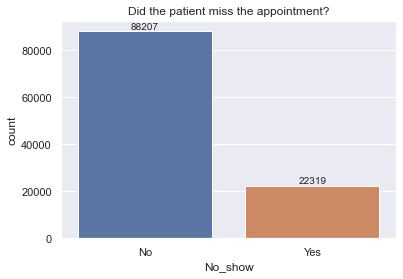

In [152]:
#'No_show' count
ax = sns.countplot(x="No_show", data=df)
ax.bar_label(ax.containers[0])
plt.title("Did the patient miss the appointment?")
plt.show()

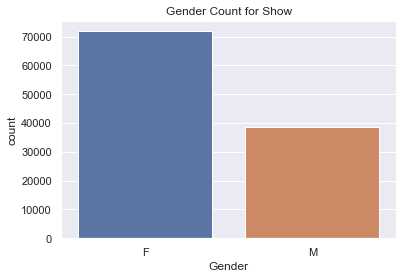

In [293]:
#gender count
ax = sns.countplot(x="Gender", data=df)
plt.title("Gender Count for Show")
plt.show()

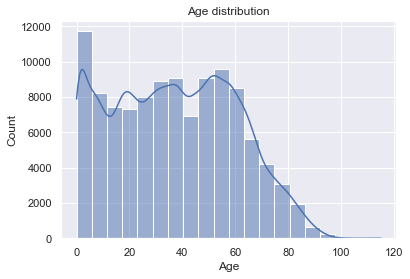

In [155]:
#Age distribution
sns.histplot(data=df, x="Age",bins=20, kde=True)
plt.title("Age distribution");

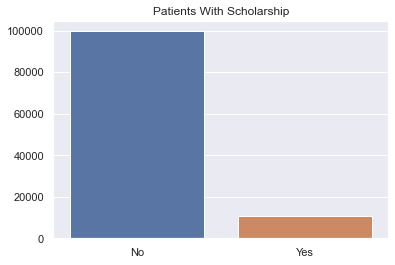

In [156]:
#Visualizing Scholarship
ax = sns.countplot(x="Scholarship", data=df)
plt.title("Patients With Scholarship")
plt.xlabel("")
plt.ylabel("")
ax.set_xticklabels(["No", "Yes"])
plt.show()

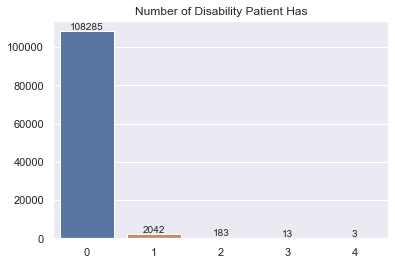

In [157]:
ax = sns.countplot(x="Handicap", data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Number of Disability Patient Has")
plt.xlabel("")
plt.ylabel("")
plt.show()

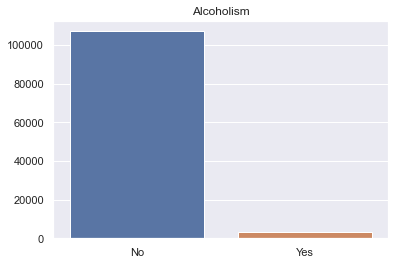

In [158]:
ax = sns.countplot(x="Alcoholism", data=df)
plt.title("Alcoholism")
plt.xlabel("")
plt.ylabel("")
ax.set_xticklabels(["No", "Yes"])
plt.show()

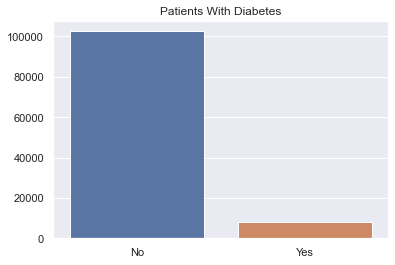

In [159]:
ax = sns.countplot(x="Diabetes", data=df)
plt.title("Patients With Diabetes")
plt.xlabel("")
plt.ylabel("")
ax.set_xticklabels(["No", "Yes"])
plt.show()

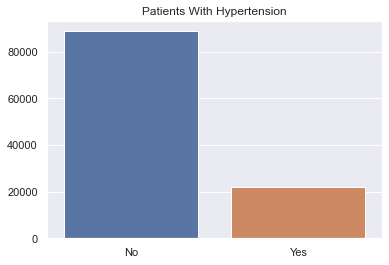

In [160]:
ax = sns.countplot(x="Hypertension", data=df)
plt.title("Patients With Hypertension")
plt.xlabel("")
plt.ylabel("")
ax.set_xticklabels(["No", "Yes"])
plt.show()

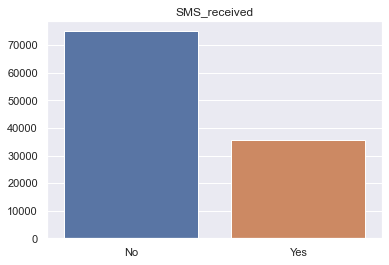

In [161]:
ax = sns.countplot(x="SMS_received", data=df)
plt.title("SMS_received")
plt.xlabel("")
plt.ylabel("")
ax.set_xticklabels(["No", "Yes"])
plt.show()

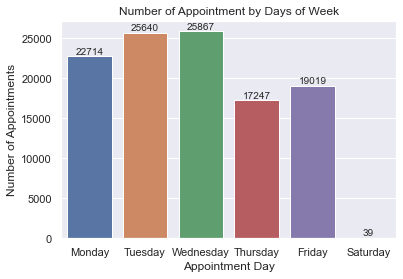

In [162]:
order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"] 

ax = sns.countplot(x="Appointment_dow", data=df, order=order)
ax.bar_label(ax.containers[0])
plt.title("Number of Appointment by Days of Week")
plt.xlabel("Appointment Day")
plt.ylabel("Number of Appointments")
plt.show()

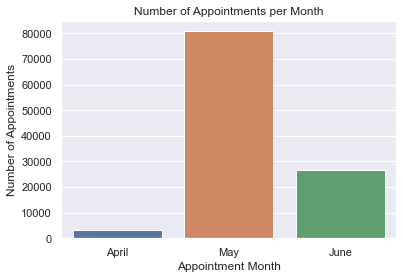

In [163]:
ax = sns.countplot(x="Appointment_mo", data=df)
plt.title("Number of Appointments per Month")
plt.xlabel("Appointment Month")
plt.ylabel("Number of Appointments")
plt.show()

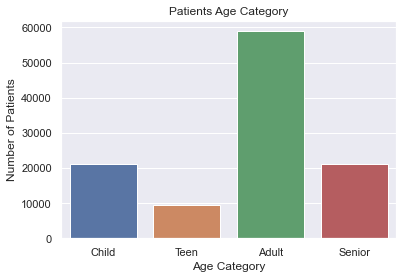

In [164]:
ax = sns.countplot(x="Age_cat", data=df)
plt.xlabel("Age Category")
plt.ylabel("Number of Patients")
plt.title("Patients Age Category")
plt.show()

> ### Visualization Insights
> 1. 20 % of patients did not show up for their appointments 
> 2. A larger percentage of the patients do not have Diabetes, Hypertension 
> 3. Most Patients do not have scholarships and are not alcholists 
> 4. Most patients are Adults 
> 5. Mondays and Tuesdays have the most appointment while Saturdays have the lowest appointments

<a id='eda'></a>
## Exploratory Data Analysis

This section delves to explore the dataset more while answering relevant questions.

### 1. What Day of The Week Has More Patients Showing Up For Their Appointments?

In [165]:
# group df by day of the week and No_show
df.groupby("Appointment_dow")["No_show"].value_counts()

Appointment_dow  No_show
Friday           No         14982
                 Yes         4037
Monday           No         18024
                 Yes         4690
Saturday         No            30
                 Yes            9
Thursday         No         13909
                 Yes         3338
Tuesday          No         20488
                 Yes         5152
Wednesday        No         20774
                 Yes         5093
Name: No_show, dtype: int64

In [273]:
# group df by day of the week and No_show(frequency)
df.groupby("Appointment_dow")["No_show"].value_counts(normalize=True)

Appointment_dow  No_show
Friday           No         0.787739
                 Yes        0.212261
Monday           No         0.793519
                 Yes        0.206481
Saturday         No         0.769231
                 Yes        0.230769
Thursday         No         0.806459
                 Yes        0.193541
Tuesday          No         0.799064
                 Yes        0.200936
Wednesday        No         0.803108
                 Yes        0.196892
Name: No_show, dtype: float64

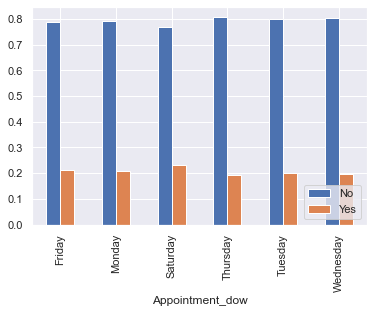

In [288]:
#Plot chart
df.groupby("Appointment_dow")["No_show"].value_counts(normalize=True).unstack(1).plot(kind="bar");
plt.legend(loc=4)

> Most patients who have their appointments on Thursdays are more likely to show up while those Patients are most likely to miss a Saturday appointment.
<br> Saturdays have the least number of appointments while Wednesdays have the most

### 2. What age category has the most appointment and what category shows up most often ?

In [167]:
#groupby age category
age_total = df.groupby("Age_cat").count()["AppointmentDay"]
age_total

Age_cat
Child     21036
Teen       9375
Adult     58942
Senior    21173
Name: AppointmentDay, dtype: int64

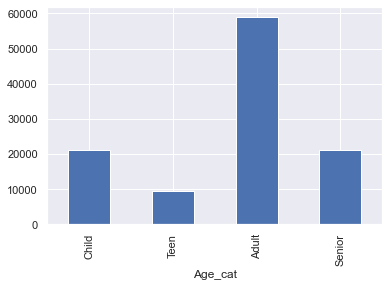

In [168]:
df.groupby("Age_cat").count()["AppointmentDay"].plot(kind='bar');

> There are more adults (20 to 59 years) with appointments, with teenagers having the least appointments

In [169]:
#groupby age category and "No_ show"
age_group = df.groupby("Age_cat")["No_show"].value_counts(normalize=True)
age_group

Age_cat  No_show
Child    No         0.795256
         Yes        0.204744
Teen     No         0.740373
         Yes        0.259627
Adult    No         0.790710
         Yes        0.209290
Senior   No         0.846880
         Yes        0.153120
Name: No_show, dtype: float64

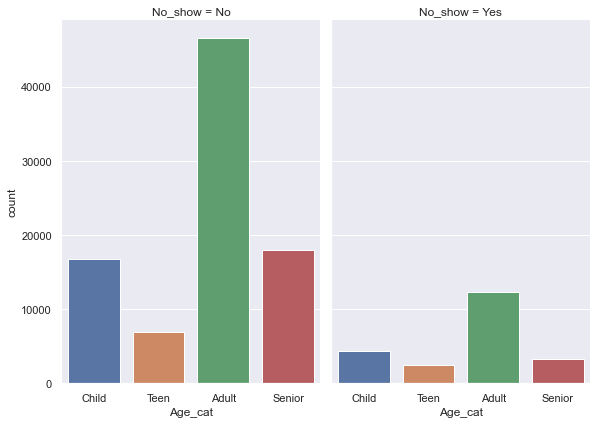

In [170]:
sns.catplot(x="Age_cat",col="No_show",data=df, kind="count", height=6, aspect=.7);

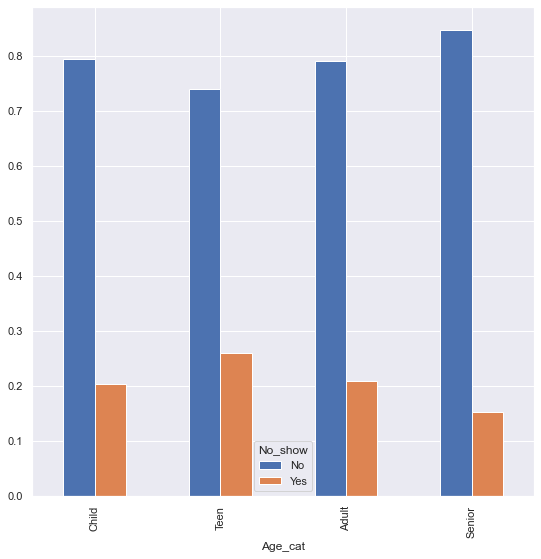

In [171]:
age_group.unstack(1).plot(kind='bar', figsize=(9,9));

> More than 80% percent of all seniors show up for their appointments while about 75% teens show up for their appointment making it the age category with the lowest frequency. <br>
> Almost 30% percent teens miss their appointments making it the age group with the most missed appointment 

### 3.What is the average waiting time?

In [172]:
# group by mean of waiting time for show and no show
df.groupby('No_show')['WaitDays'].mean()

No_show
No      8.754759
Yes    15.831937
Name: WaitDays, dtype: float64

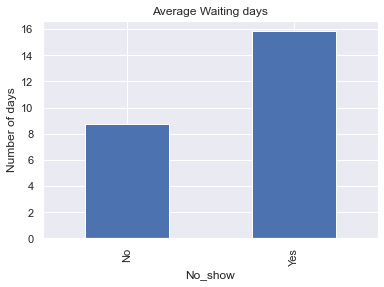

In [173]:
# group by mean of waiting time for show and no show
df.groupby('No_show')['WaitDays'].mean().plot(kind='bar')
plt.title("Average Waiting days")
plt.ylabel("Number of days");

> Those who missed their appointment waited an average of 16 days while those who attended it waited a shorter period of 9 days

### 4. Who has the longest waiting time ?

In [174]:
df.groupby("Age_cat")['WaitDays'].mean()

Age_cat
Child      9.742299
Teen       9.117440
Adult     10.170473
Senior    11.132149
Name: WaitDays, dtype: float64

> Seniors have the highest wait time of 11 days while teens have the lowest(9 days) on average.

In [175]:
df.groupby(["Age_cat", "No_show"])['WaitDays'].mean()

Age_cat  No_show
Child    No          7.971008
         Yes        16.622243
Teen     No          7.446477
         Yes        13.882498
Adult    No          8.676308
         Yes        15.815499
Senior   No         10.196308
         Yes        16.308143
Name: WaitDays, dtype: float64

> For patients who showed up for their appointments, teens waited an average of 7 days with the longest days waited being 10 days by seniors <br>
> For patients who did not show up for their appointment, Children waited longer for 17 days , while teens waited about 14 days

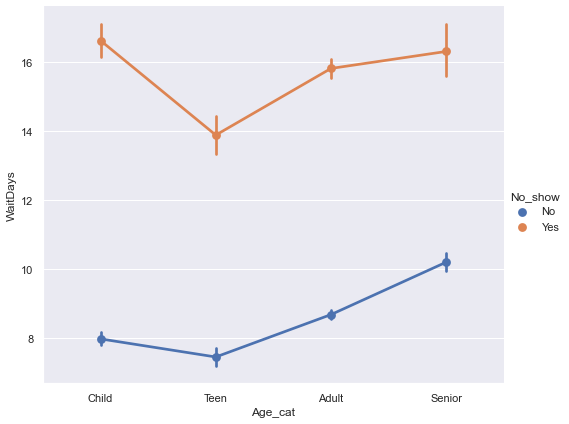

In [290]:
sns.catplot(y="WaitDays",x="Age_cat", hue="No_show", data=df, kind="point", height=6,aspect=1.2);

### 5. Is the ratio of missed appointment for males greater or lesser than that of females ?

In [177]:
gender_group = df.groupby('Gender')['No_show'].value_counts(normalize=True)
gender_group

Gender  No_show
F       No         0.796851
        Yes        0.203149
M       No         0.800321
        Yes        0.199679
Name: No_show, dtype: float64

In [178]:
#Percentage who showed up for appointment
gender_group.loc[[("F","No"), ("M","No")]]

Gender  No_show
F       No         0.796851
M       No         0.800321
Name: No_show, dtype: float64

> More men showed up for their appointments than females

In [179]:
#Percentage who did not show up for appointment
gender_group.loc[[("F","Yes"), ("M","Yes")]]

Gender  No_show
F       Yes        0.203149
M       Yes        0.199679
Name: No_show, dtype: float64

> 20% females did not show up for their appointment

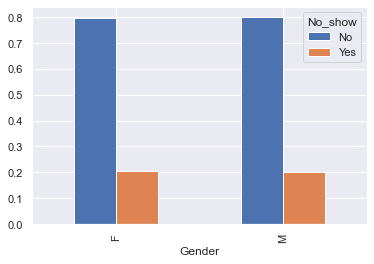

In [180]:
df.groupby('Gender')['No_show'].value_counts(normalize=True).unstack(1).plot(kind='bar');

### 6. What is the location with the highest number of show ups ?

In [181]:
# top 5 locations
df.groupby(["Neighbourhood"]).count()["PatientId"].nlargest(5)

Neighbourhood
JARDIM CAMBURI     7717
MARIA ORTIZ        5805
RESISTÊNCIA        4431
JARDIM DA PENHA    3877
ITARARÉ            3514
Name: PatientId, dtype: int64

In [228]:
# last 5 locations
df.groupby(["Neighbourhood"]).count()["PatientId"].nsmallest(5)

Neighbourhood
PARQUE INDUSTRIAL               1
ILHAS OCEÂNICAS DE TRINDADE     2
AEROPORTO                       8
ILHA DO FRADE                  10
ILHA DO BOI                    35
Name: PatientId, dtype: int64

> JARDIM CAMBURI has the most number of appointments while PARQUE INDUSTRIAL has the lowest number of appointment

In [224]:
# top 5 neighbourhood with appointment met
top_5 = df[df['No_show'] == 'No'].groupby("Neighbourhood").count()["No_show"].nlargest()
top_5

Neighbourhood
JARDIM CAMBURI     6252
MARIA ORTIZ        4586
RESISTÊNCIA        3525
JARDIM DA PENHA    3246
SANTA MARTHA       2635
Name: No_show, dtype: int64

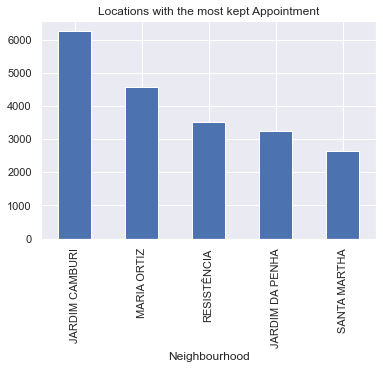

In [227]:
top_5.plot(kind='bar')
plt.title("Locations with the most kept Appointment");

> JARDIM CAMBURI is the location with the highest number of appointment kept. <br>

In [230]:
# last 5 neighbourhood with appointment met
last_5 = df[df['No_show'] == 'No'].groupby("Neighbourhood").count()["No_show"].nsmallest()
last_5

Neighbourhood
PARQUE INDUSTRIAL     1
AEROPORTO             7
ILHA DO FRADE         8
ILHA DO BOI          32
PONTAL DE CAMBURI    57
Name: No_show, dtype: int64

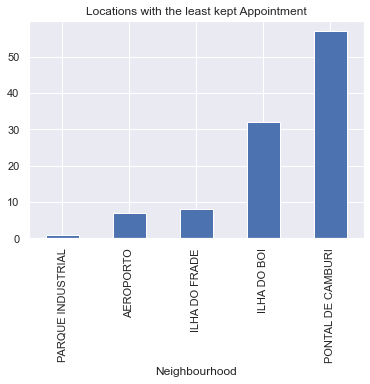

In [231]:
last_5.plot(kind='bar')
plt.title("Locations with the least kept Appointment");

> PARQUE INDUSTRIAL has the least kept appointment

In [232]:
# top 5 neighbourhood with appointment missed
top_5_missed = df[df['No_show'] == 'Yes'].groupby("Neighbourhood").count()["No_show"].nlargest()
top_5_missed

Neighbourhood
JARDIM CAMBURI    1465
MARIA ORTIZ       1219
ITARARÉ            923
RESISTÊNCIA        906
CENTRO             703
Name: No_show, dtype: int64

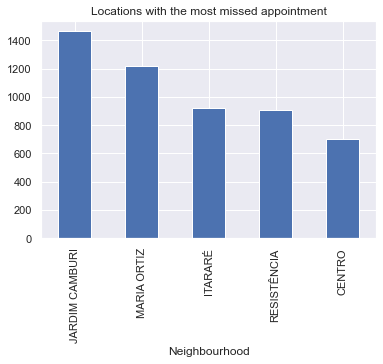

In [233]:
top_5_missed.plot(kind='bar')
plt.title("Locations with the most missed appointment");

> JARDIM CAMBURI is the location with the highest number of missed appointment

In [234]:
# last 5 neighbourhood with appointment missed
last_5_missed = df[df['No_show'] == 'Yes'].groupby("Neighbourhood").count()["No_show"].nsmallest()
last_5_missed

Neighbourhood
AEROPORTO                       1
ILHA DO FRADE                   2
ILHAS OCEÂNICAS DE TRINDADE     2
ILHA DO BOI                     3
PONTAL DE CAMBURI              12
Name: No_show, dtype: int64

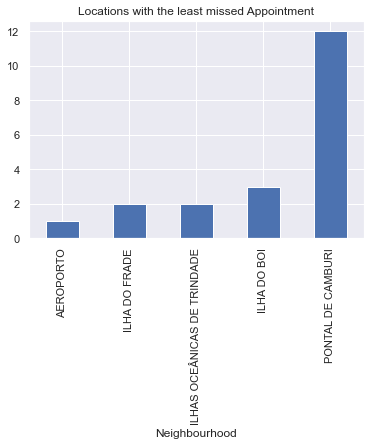

In [235]:
last_5_missed.plot(kind='bar')
plt.title("Locations with the least missed Appointment");

> AEROPORTO has the least missed appointment

> JARDIM CAMBURI has the highest total number of appointments and the most kept appointments while PARQUE INDUSTRIAL has the least kept appointment <br>
> JARDIM CAMBURI also has the highest number of missed appoinment

<a id='conclusions'></a>
## Conclusions

Before cleaning the data set, it had originally 110,527 rows and 14 columns. After data cleaning, The data now has 110,526 rows and 18 columns.
Investigion on the dataset shows that:
1. They're more females
2. Those who showed up for their appointment were over 88,000. 
3. More than half of the patients do not have scholarship, had no disabilities, were non alcoholic, did not have diabetes, did not have hypertension and didn't receive SMS.
4. Wednesdays had the highest number of appointments while May is the month with the highest number of appointment.
5. Adults aged 20 to 59 had the highest number of appointments. 

Further exploratory analysis of the data showed that:
- Although Wednesdays have the most number of appointment patients are most likely to keep the appointment scheduled for Thursdays. Saturdays are least appointment day likely to be kept.
- A large portion of appointments are made by  adults(20 to 59), but less than 80% show up for their appointment. Over 80% of all seniors 60 and above who made an appointment shows up for it.
- The total average wait time for appointments is 10 days. The average wait time for patients who showed up for their appointment is 9 days while for those who didn't show up for their appointment it is 16 days.
- Seniors wait an average of 11 days while teens wait an average of 9 days.
- Children who missed their appointment waited an average of 17 days.
- 79.69% of females showed up for their appointment while 80.03% of males showed up for their appointment.
- JARDIM CAMBURI has the most patients and the highest number of show ups and missed appointments.
- PARQUE INDUSTRIAL has only one patient who shows up for their appointment.
